## Header

In [1]:
%env MKL_NUM_THREADS=1
%env NUMEXPR_NUM_THREADS=1
%env OMP_NUM_THREADS=1

env: MKL_NUM_THREADS=1
env: NUMEXPR_NUM_THREADS=1
env: OMP_NUM_THREADS=1


In [2]:
# %load_ext line_profiler
%load_ext autoreload
%autoreload 2

In [3]:
import qcf

import numpy as np
from math import pi
import matplotlib.pyplot as plt

## Confusion matrix, qiskit QM run, 10000 shots, 10 qubits, ibm_hanoi

In [4]:
# hardware, machine, device_name = 'IBM', 'VM', 'local'
# hardware, machine, device_name = 'Rigetti', 'VM', 'local'
# hardware, machine, device_name = 'Google', 'VM', 'local'
hardware, machine, device_name = 'IBM', 'QM', 'ibm_hanoi'
API, Gates, Qubits = qcf.hardware_switch(hardware)

In [5]:
seed = 480807089
x_dim, y_dim = 1, 10

noise = None
# noise = dict(T1=15e-06, T2=15e-06, gate_time_1q=50e-09, gate_time_2q=150e-09, ro_fidelity=[0.95, 0.9])

# qubit_info = Qubits(x_dim=x_dim, y_dim=y_dim, qubit_map=[3, 5, 8, 11])
qubit_info = Qubits(x_dim=x_dim, y_dim=y_dim, qubit_map=[3, 5, 8, 11, 14, 16, 19, 22, 25, 26])
device = qcf.Device(
    qubit=qubit_info,
    hardware=hardware, machine=machine, device_name=device_name, sim_noise=noise)

In [6]:
confusion_matrix = qcf.measurement.ConfusionMatrix(device, measure_run_opts=dict(n_measure=10000))
jobs = confusion_matrix.measure(return_submission=True)

In [16]:
print(len(jobs))
qm = API.get_qm('QM', device_name)
max_circuits = qm.configuration().max_experiments
jobs_splitted = qcf.utilities.split_list(jobs, max_circuits)
print(max_circuits)

1024
300


In [21]:
r = []
for jobs in jobs_splitted:
    r.append(
        qcf.measurement_multiple_backend_circuit_interface(
            device, submission_list=jobs, API=API, process_output_to_dist=False)
    )
r = qcf.utilities.flatten_list(r, max_recursion=1)

Job 62020fc2c8691f943fb6ba13
Job Status: job has successfully run
Job 6202136036a7912693a033a7
Job Status: job has successfully run
Job 620217200346cd6d2f149d43
Job Status: job has successfully run
Job 62021bc9f7a5d8d1f20b4146
Job Status: job has successfully run


In [22]:
qcf.utilities.save_compressed(r, 'ibm_hanoi_confusion_matrix.lz', mode='lzma')

/home/ali/Dropbox/Coding/Development/quantum_near_term/VQE/code/qcf/utilities/io.py:83: RuntimeWarning: Cannot create directory 
  warnings.warn(msg, RuntimeWarning)


In [23]:
r = qcf.utilities.load_compressed('ibm_hanoi_confusion_matrix.lz', mode='lzma')
confusion_matrix.input_measure_result(r)

In [24]:
m = confusion_matrix.get_matrix()
# cm_parallel, cm_serial = confusion_matrix.analyze_bitflip_model()

# print(confusion_matrix.get_timestamp())
# print(np.max(m - cm_parallel))
# print(np.max(m - cm_serial))
# print(np.max(cm_parallel - cm_serial))

In [26]:
qcf.utilities.save_compressed(m, 'ibm_hanoi_confusion_matrix_value.lz', mode='lzma')

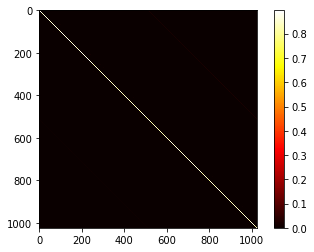

In [25]:
confusion_matrix.heatmap().show()

## Confusion matrix, qiskit QM run, 100000 shots, 10 qubits, ibm_hanoi

In [30]:
# hardware, machine, device_name = 'IBM', 'VM', 'local'
# hardware, machine, device_name = 'Rigetti', 'VM', 'local'
# hardware, machine, device_name = 'Google', 'VM', 'local'
hardware, machine, device_name = 'IBM', 'QM', 'ibm_hanoi'
API, Gates, Qubits = qcf.hardware_switch(hardware)

In [31]:
seed = 480807089
x_dim, y_dim = 1, 10

noise = None
# noise = dict(T1=15e-06, T2=15e-06, gate_time_1q=50e-09, gate_time_2q=150e-09, ro_fidelity=[0.95, 0.9])

# qubit_info = Qubits(x_dim=x_dim, y_dim=y_dim, qubit_map=[3, 5, 8, 11])
qubit_info = Qubits(x_dim=x_dim, y_dim=y_dim, qubit_map=[3, 5, 8, 11, 14, 16, 19, 22, 25, 26])
device = qcf.Device(
    qubit=qubit_info,
    hardware=hardware, machine=machine, device_name=device_name, sim_noise=noise)

In [32]:
confusion_matrix = qcf.measurement.ConfusionMatrix(device, measure_run_opts=dict(n_measure=100000))
jobs = confusion_matrix.measure(return_submission=True)

In [33]:
print(len(jobs))
qm = API.get_qm('QM', device_name)
max_circuits = qm.configuration().max_experiments
jobs_splitted = qcf.utilities.split_list(jobs, max_circuits-100)
print(max_circuits)

1024
300


In [34]:
r = []
for jobs in jobs_splitted:
    r.append(
        qcf.measurement_multiple_backend_circuit_interface(
            device, submission_list=jobs, API=API, process_output_to_dist=False)
    )
r = qcf.utilities.flatten_list(r, max_recursion=1)

Retry count: 1.Error when executing <function IBMAPI._circuit_execute_remote_base at 0x7fca84cdf158> with message: 'Error submitting job: "(\'Connection aborted.\', ConnectionResetError(104, \'Connection reset by peer\'))"'. 
Job 62022166620089588edde6a2
Job Status: job has successfully run
Job 6202389d9b789ca1cf031bfd
Job Status: job has successfully run


Job 62024f550346cdf61e149e67
Job Status: job has successfully run


Job 6202671f9b789c341d031ce5
Job Status: job has successfully run


Job 6202899ee5232b37d8c9495a
Job Status: job has successfully run


Job 6202a1989a22dd2289e9b1d6
Job Status: job has successfully run


In [35]:
qcf.utilities.save_compressed(r, 'ibm_hanoi_100000_confusion_matrix.lz', mode='lzma')

In [36]:
r = qcf.utilities.load_compressed('ibm_hanoi_100000_confusion_matrix.lz', mode='lzma')
confusion_matrix.input_measure_result(r)

In [37]:
m = confusion_matrix.get_matrix()
# cm_parallel, cm_serial = confusion_matrix.analyze_bitflip_model()

# print(confusion_matrix.get_timestamp())
# print(np.max(m - cm_parallel))
# print(np.max(m - cm_serial))
# print(np.max(cm_parallel - cm_serial))

In [38]:
qcf.utilities.save_compressed(m, 'ibm_hanoi_100000_confusion_matrix_value.lz', mode='lzma')

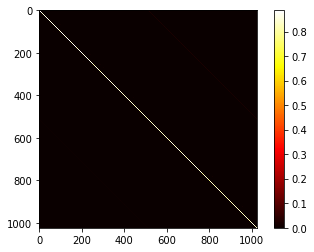

In [39]:
confusion_matrix.heatmap().show()

## Confusion matrix, qiskit QM run, 10000 shots, 12 qubits, ibm_hanoi

In [14]:
# 2022-02-08

In [4]:
# hardware, machine, device_name = 'IBM', 'VM', 'local'
# hardware, machine, device_name = 'Rigetti', 'VM', 'local'
# hardware, machine, device_name = 'Google', 'VM', 'local'
hardware, machine, device_name = 'IBM', 'QM', 'ibm_hanoi'
API, Gates, Qubits = qcf.hardware_switch(hardware)

In [5]:
seed = 480807089
x_dim, y_dim = 1, 12

noise = None
# noise = dict(T1=15e-06, T2=15e-06, gate_time_1q=50e-09, gate_time_2q=150e-09, ro_fidelity=[0.95, 0.9])

# qubit_info = Qubits(x_dim=x_dim, y_dim=y_dim, qubit_map=[3, 5, 8, 11])
qubit_info = Qubits(x_dim=x_dim, y_dim=y_dim, qubit_map=[1, 2, 3, 5, 8, 11, 14, 16, 19, 22, 25, 26])
device = qcf.Device(
    qubit=qubit_info,
    hardware=hardware, machine=machine, device_name=device_name, sim_noise=noise)

In [6]:
confusion_matrix = qcf.measurement.ConfusionMatrix(device, measure_run_opts=dict(n_measure=10000))
jobs = confusion_matrix.measure(return_submission=True)

In [7]:
print(len(jobs))
qm = API.get_qm('QM', device_name)
max_circuits = qm.configuration().max_experiments
jobs_splitted = qcf.utilities.split_list(jobs, max_circuits)
print(max_circuits)

4096
300


In [8]:
r = []
for jobs in jobs_splitted:
    r.append(
        qcf.measurement_multiple_backend_circuit_interface(
            device, submission_list=jobs, API=API, process_output_to_dist=False)
    )
r = qcf.utilities.flatten_list(r, max_recursion=1)

Job 6202bfd2ce2816f27580c772
Job Status: job has successfully run
Job 6202c34702fbd30dd07f5abb
Job Status: job has successfully run
Job 6202c7299a22dd22dee9b26d
Job Status: job has successfully run
Job 6202ca99ce28162b7d80c7a4
Job Status: job has successfully run
Job 6202ce16ca92663a9cedc2b0
Job Status: job has successfully run
Job 6202d199f491bd2e428ede07
Job Status: job has successfully run
Job 6202d516e5232b6918c94aa2
Job Status: job has successfully run
Job 6202dfa624843e7e796f7bf9
Job Status: job has successfully run
Job 6202e3213f4826d765709a92
Job Status: job has successfully run
Job 6202e69c02fbd339c07f5b99
Job Status: job has successfully run
Job 6202ea85e5232bd248c94b17
Job Status: job has successfully run
Job 6202edfdca9266300dedc378
Job Status: job has successfully run
Job 6202f875f491bd6da78edef6
Job Status: job has successfully run
Job 6202fc59e5232be512c94b7f
Job Status: job has successfully run


In [9]:
qcf.utilities.save_compressed(r, 'ibm_hanoi_confusion_matrix_12q_10000s.lz', mode='lzma')

/home/ali/Dropbox/Coding/Development/quantum_near_term/VQE/code/qcf/utilities/io.py:83: RuntimeWarning: Cannot create directory 
  warnings.warn(msg, RuntimeWarning)


In [10]:
r = qcf.utilities.load_compressed('ibm_hanoi_confusion_matrix_12q_10000s.lz', mode='lzma')
confusion_matrix.input_measure_result(r)

In [11]:
m = confusion_matrix.get_matrix()
# cm_parallel, cm_serial = confusion_matrix.analyze_bitflip_model()

# print(confusion_matrix.get_timestamp())
# print(np.max(m - cm_parallel))
# print(np.max(m - cm_serial))
# print(np.max(cm_parallel - cm_serial))

In [12]:
qcf.utilities.save_compressed(m, 'ibm_hanoi_confusion_matrix_12q_10000s_value.lz', mode='lzma')

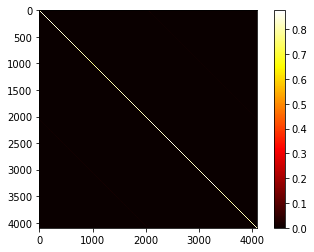

In [13]:
confusion_matrix.heatmap().show()

## Confusion matrix, qiskit QM run, 10000 shots, 12 qubits, ibm_cairo

In [4]:
# 2022-02-08

In [5]:
# hardware, machine, device_name = 'IBM', 'VM', 'local'
# hardware, machine, device_name = 'Rigetti', 'VM', 'local'
# hardware, machine, device_name = 'Google', 'VM', 'local'
hardware, machine, device_name = 'IBM', 'QM', 'ibm_cairo'
API, Gates, Qubits = qcf.hardware_switch(hardware)

In [6]:
seed = 480807089
x_dim, y_dim = 1, 12

noise = None
# noise = dict(T1=15e-06, T2=15e-06, gate_time_1q=50e-09, gate_time_2q=150e-09, ro_fidelity=[0.95, 0.9])

# qubit_info = Qubits(x_dim=x_dim, y_dim=y_dim, qubit_map=[3, 5, 8, 11])
qubit_info = Qubits(x_dim=x_dim, y_dim=y_dim, qubit_map=[1, 2, 3, 5, 8, 11, 14, 16, 19, 22, 25, 26])
device = qcf.Device(
    qubit=qubit_info,
    hardware=hardware, machine=machine, device_name=device_name, sim_noise=noise)

In [7]:
confusion_matrix = qcf.measurement.ConfusionMatrix(device, measure_run_opts=dict(n_measure=10000))
jobs = confusion_matrix.measure(return_submission=True)

In [8]:
print(len(jobs))
qm = API.get_qm('QM', device_name)
max_circuits = qm.configuration().max_experiments
jobs_splitted = qcf.utilities.split_list(jobs, max_circuits)
print(max_circuits)

4096
300


In [9]:
r = []
for jobs in jobs_splitted:
    r.append(
        qcf.measurement_multiple_backend_circuit_interface(
            device, submission_list=jobs, API=API, process_output_to_dist=False)
    )
r = qcf.utilities.flatten_list(r, max_recursion=1)

Job 620303d6ca926609b7edc41d
Job Status: job has successfully run
Job 6203074a02fbd32d7c7f5c91
Job Status: job has successfully run
Job 62030ae59a22ddb3ece9b424
Job Status: job has successfully run
Job 62030ee9e5232b591cc94c06
Job Status: job has successfully run
Job 6203125fe5232b7baac94c20
Job Status: job has successfully run
Job 620315f7f491bd1c568edfeb
Job Status: job has successfully run
Job 620319821c54c52f968a4a5c
Job Status: job has successfully run
Job 62031da5e5232bfd53c94c77
Job Status: job has successfully run
Job 6203210d24843e723e6f7da7
Job Status: job has successfully run
Job 6203248be5232b7853c94cae
Job Status: job has successfully run
Job 6203280ace2816857180ca15
Job Status: job has successfully run
Job 62032b8a24843e3e266f7de3
Job Status: job has successfully run
Job 620333651c54c54af48a4af3
Job Status: job has successfully run
Job 620336d3ce281645f980ca74
Job Status: job has successfully run


In [10]:
qcf.utilities.save_compressed(r, 'ibm_cairo_confusion_matrix_12q_10000s.lz', mode='lzma')

/home/ali/Dropbox/Coding/Development/quantum_near_term/VQE/code/qcf/utilities/io.py:83: RuntimeWarning: Cannot create directory 
  warnings.warn(msg, RuntimeWarning)


In [11]:
r = qcf.utilities.load_compressed('ibm_cairo_confusion_matrix_12q_10000s.lz', mode='lzma')
confusion_matrix.input_measure_result(r)

In [12]:
m = confusion_matrix.get_matrix()
# cm_parallel, cm_serial = confusion_matrix.analyze_bitflip_model()

# print(confusion_matrix.get_timestamp())
# print(np.max(m - cm_parallel))
# print(np.max(m - cm_serial))
# print(np.max(cm_parallel - cm_serial))

In [13]:
qcf.utilities.save_compressed(m, 'ibm_cairo_confusion_matrix_12q_10000s_value.lz', mode='lzma')

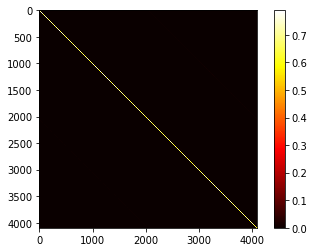

In [14]:
confusion_matrix.heatmap().show()

## Confusion matrix, qiskit QM run, 10000 shots, 12 qubits, ibmq_toronto

In [ ]:
# 2022-02-09

In [15]:
# hardware, machine, device_name = 'IBM', 'VM', 'local'
# hardware, machine, device_name = 'Rigetti', 'VM', 'local'
# hardware, machine, device_name = 'Google', 'VM', 'local'
hardware, machine, device_name = 'IBM', 'QM', 'ibmq_toronto'
API, Gates, Qubits = qcf.hardware_switch(hardware)

In [16]:
seed = 480807089
x_dim, y_dim = 1, 12

noise = None
# noise = dict(T1=15e-06, T2=15e-06, gate_time_1q=50e-09, gate_time_2q=150e-09, ro_fidelity=[0.95, 0.9])

# qubit_info = Qubits(x_dim=x_dim, y_dim=y_dim, qubit_map=[3, 5, 8, 11])
qubit_info = Qubits(x_dim=x_dim, y_dim=y_dim, qubit_map=[1, 2, 3, 5, 8, 11, 14, 16, 19, 22, 25, 26])
device = qcf.Device(
    qubit=qubit_info,
    hardware=hardware, machine=machine, device_name=device_name, sim_noise=noise)

In [17]:
confusion_matrix = qcf.measurement.ConfusionMatrix(device, measure_run_opts=dict(n_measure=10000))
jobs = confusion_matrix.measure(return_submission=True)

In [18]:
print(len(jobs))
qm = API.get_qm('QM', device_name)
max_circuits = qm.configuration().max_experiments
jobs_splitted = qcf.utilities.split_list(jobs, max_circuits)
print(max_circuits)

4096
900


In [19]:
r = []
for jobs in jobs_splitted:
    r.append(
        qcf.measurement_multiple_backend_circuit_interface(
            device, submission_list=jobs, API=API, process_output_to_dist=False)
    )
r = qcf.utilities.flatten_list(r, max_recursion=1)

Job 6203744ecc3ddb2f31bc02e1
Job Status: job has successfully run
Job 620389f0e5232b15f2c94f80
Job Status: job has successfully run


Job 62039ca5ca926663fcedc7f3
Job Status: job has successfully run


Job 6203a7829a22ddd39be9b7fe
Job Status: job has successfully run


Job 6203b932ca926626d0edc85c
Job Status: job has successfully run


In [20]:
qcf.utilities.save_compressed(r, 'ibmq_toronto_confusion_matrix_12q_10000s.lz', mode='lzma')

In [21]:
r = qcf.utilities.load_compressed('ibmq_toronto_confusion_matrix_12q_10000s.lz', mode='lzma')
confusion_matrix.input_measure_result(r)

In [22]:
m = confusion_matrix.get_matrix()
# cm_parallel, cm_serial = confusion_matrix.analyze_bitflip_model()

# print(confusion_matrix.get_timestamp())
# print(np.max(m - cm_parallel))
# print(np.max(m - cm_serial))
# print(np.max(cm_parallel - cm_serial))

In [23]:
qcf.utilities.save_compressed(m, 'ibmq_toronto_confusion_matrix_12q_10000s_value.lz', mode='lzma')

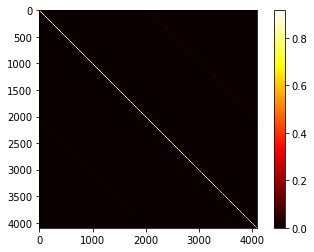

In [24]:
confusion_matrix.heatmap().show()

## comparison

In [42]:
m10000 = qcf.utilities.load_compressed('ibm_hanoi_confusion_matrix_value.lz', mode='lzma')
m100000 = qcf.utilities.load_compressed('ibm_hanoi_100000_confusion_matrix_value.lz', mode='lzma')